In [2]:
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# user_count = 10
# edges = pd.read_csv('connections.csv').to_records(index=False)
edges = pd.read_csv('exam_5a.csv').to_records(index=False)
# edges = pd.read_csv('exam_5b.csv').to_records(index=False)
edges = [item for item in list(edges) if item[0] != item[1]]
# edges

# Undirected Graph

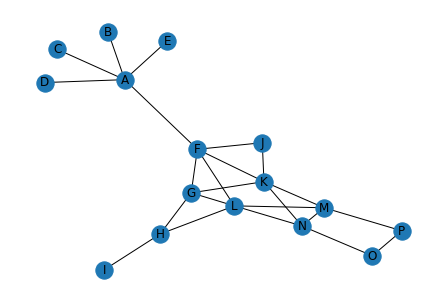

In [12]:

G = nx.Graph(directed=False)
G.add_edges_from(edges)

nx.draw(G, with_labels=True)
plt.show() 

In [13]:
norm = False
degree = pd.Series(nx.degree_centrality(G, normalized= norm))
betweenness = pd.Series(nx.betweenness_centrality(G, normalized= norm))
closeness = pd.Series(nx.closeness_centrality(G, normalized= norm))

TypeError: degree_centrality() got an unexpected keyword argument 'normalized'

## Core & Cliques

In [14]:
from networkx.algorithms.community import k_clique_communities

k_clique_size = 4

n_core_size = 3

IndexError: list index out of range

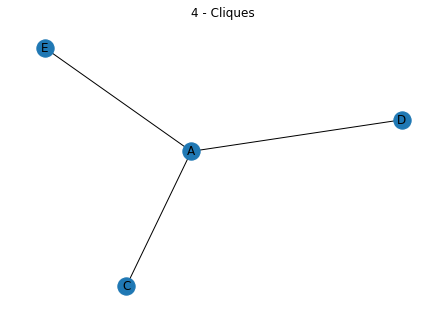

In [15]:
c = list(k_clique_communities(G, k_clique_size))
c

# nx.draw(G.subgraph(c[0]), with_labels = True)
nx.draw(G.subgraph(['A','D','C','E']), with_labels = True)
plt.title(f'{k_clique_size} - Cliques')

print(f'nodes in {k_clique_size} Core: ', c[0])

nodes in 3 Core:  ['F', 'G', 'L', 'K', 'M', 'N']


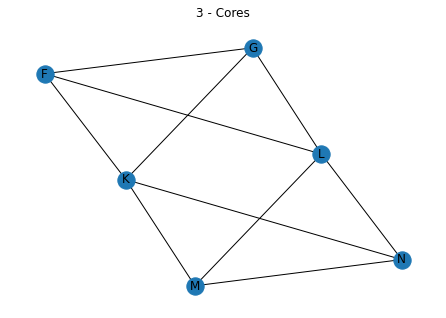

In [16]:
core_dict = dict()
dct = nx.core_number(G)
for node in dct:
    if dct[node] in core_dict:
        core_dict[dct[node]].append(node)
    else:
        core_dict[dct[node]] = [node]
core_dict

nx.draw(G.subgraph(core_dict[n_core_size]), with_labels = True)
plt.title(f'{n_core_size} - Cores')
print(f'nodes in {n_core_size} Core: ', core_dict[n_core_size])